# Loan Prediction Classification

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Cleaning Data

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [112]:
df.duplicated().sum()

0

In [113]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [114]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [115]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [116]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [117]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

### Univariate Analyst

#### Histogram and Box Plot

In [118]:
def whisker(df, whis_lenght):
    Q3 = df.quantile(0.75)
    Q1 = df.quantile(0.25)
    IQR = Q3-Q1
    whis_down = Q1 - (whis_lenght*IQR)
    whis_top = Q3 + (whis_lenght*IQR)
    return whis_down, whis_top

In [119]:
df["total_assets"] = df["residential_assets_value"] + df["commercial_assets_value"] + df["luxury_assets_value"] + df["bank_asset_value"]

<Axes: xlabel='total_assets_log', ylabel='Count'>

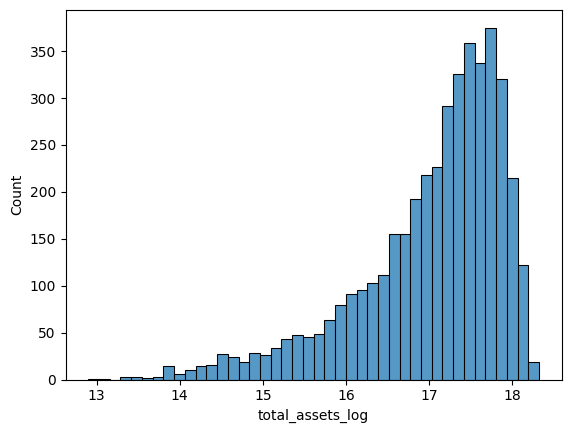

In [120]:
df["total_assets_log"] = np.log(df["total_assets"])
sns.histplot(df["total_assets_log"])

<Axes: >

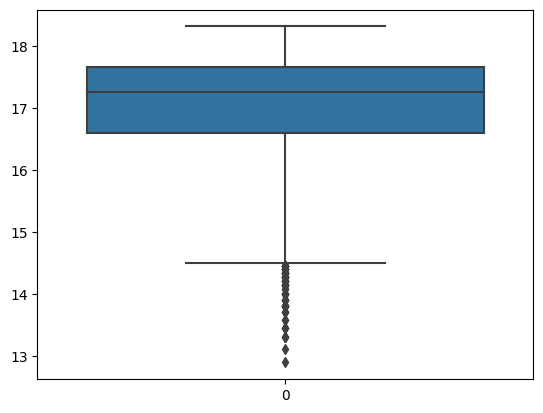

In [121]:
sns.boxplot(df["total_assets_log"],
           whis=2)

In [122]:
# Number of Outlier Data
(df["total_assets_log"] < whisker(df["total_assets_log"], 2)[0]).sum()

84

In [123]:
# Remove Outlier
df_new = df[ (df["total_assets_log"] > whisker(df["total_assets_log"], 2)[0]) ]
df_new.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,total_assets_log
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000,17.741436
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000,16.648724
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000,17.870768
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000,17.780126
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000,17.822844


#### Countplot

no_of_dependents
4    735
3    716
2    696
0    695
1    681
5    662
Name: count, dtype: int64




<Axes: xlabel='no_of_dependents', ylabel='count'>

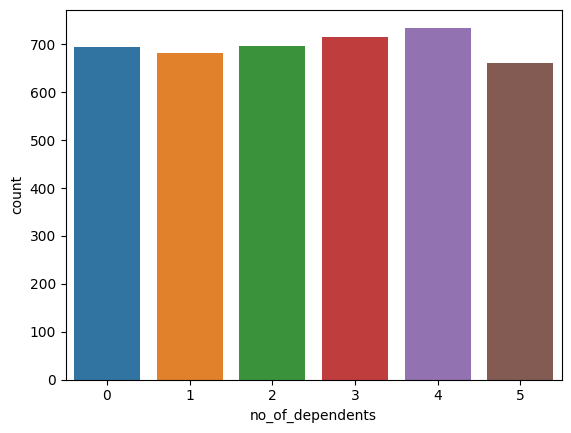

In [124]:
print(df_new["no_of_dependents"].value_counts())
print("\n")

sns.countplot(
    x="no_of_dependents",
    data=df_new
)

education
 Graduate        2106
 Not Graduate    2079
Name: count, dtype: int64




<Axes: xlabel='education', ylabel='count'>

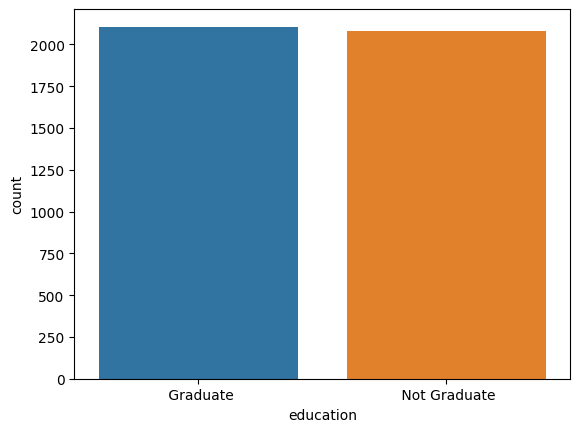

In [125]:
print(df_new["education"].value_counts())
print("\n")

sns.countplot(
    x="education",
    data=df_new
)

self_employed
 Yes    2106
 No     2079
Name: count, dtype: int64




<Axes: xlabel='self_employed', ylabel='count'>

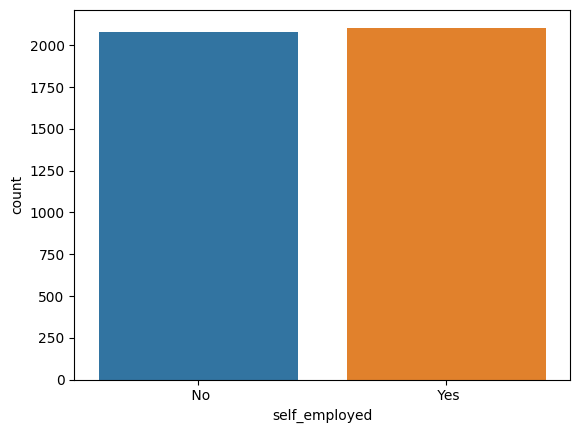

In [126]:
print(df_new["self_employed"].value_counts())
print("\n")

sns.countplot(
    x="self_employed",
    data=df_new
)

loan_status
 Approved    2601
 Rejected    1584
Name: count, dtype: int64




<Axes: xlabel='loan_status', ylabel='count'>

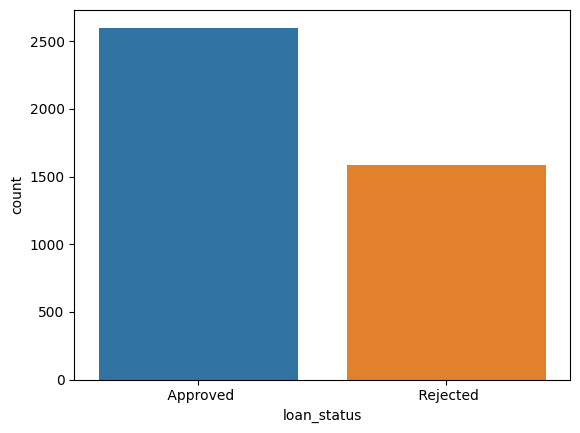

In [127]:
print(df_new["loan_status"].value_counts())
print("\n")

sns.countplot(
    x="loan_status",
    data=df_new
)

In [128]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,total_assets_log
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000,17.741436
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000,16.648724
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000,17.870768
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000,17.780126
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000,17.822844


### Encoding and Scalling Data

In [129]:
X = df.iloc[:,np.r_[1:8, 13:14]].values
y = df["loan_status"].values

In [130]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
y = le.fit_transform(y)

In [131]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X[:, 3:] = mms.fit_transform(X[:, 3:])
X = X.astype(float) # Changing dtype var

### Model Selection

In [132]:
from sklearn.model_selection import train_test_split, cross_val_score

In [133]:
def classify(model, x, y, cv_num):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state=0)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Accuracy Score: {round(acc*100, 2)}%")
    
    val_acc = cross_val_score(model, x, y, cv=cv_num)
    print(f"Validation Score: {round(np.mean(val_acc)*100, 2)}%")

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [135]:
# Select the best model based on their cross validation score
print("Logistic Regression:")
lr = LogisticRegression()
classify(lr, X, y, 5)

print("\nSupport Vector Classifier:")
svc = SVC()
classify(svc, X, y, 5)

print("\nDecision Tree:")
dt = DecisionTreeClassifier()
classify(dt, X, y, 5)

print("\nExtra Tree:")
et = ExtraTreeClassifier()
classify(et, X, y, 5)

print("\nRandom Forest:")
rf = RandomForestClassifier()
classify(et, X, y, 5)

Logistic Regression:
Accuracy Score: 92.27%
Validation Score: 91.73%

Support Vector Classifier:
Accuracy Score: 93.21%
Validation Score: 93.0%

Decision Tree:
Accuracy Score: 98.24%
Validation Score: 98.2%

Extra Tree:
Accuracy Score: 88.52%
Validation Score: 87.82%

Random Forest:
Accuracy Score: 84.89%
Validation Score: 83.86%


### Paramater Tuning

In [136]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=0)

In [137]:
# Tuning Parameter Model
parameters = {
    "max_depth" : [5, 10, 15, 20, 25, 30],
    "criterion" : ("gini", "entropy", "log_loss"),
    "min_samples_split":(2,4,6)
}

In [138]:
from sklearn.model_selection import RandomizedSearchCV
dt_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=parameters, cv=5, verbose=True)

In [139]:
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy',
                                                      'log_loss'),
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [140]:
# Checking Best Estimator from Model
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=4)

In [141]:
#Building Model
dt = DecisionTreeClassifier(criterion="entropy",
                           max_depth=15,
                           min_samples_split=4)

### Building Model

In [150]:
# Training Model
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=4)

In [151]:
# Accuracy Score from Data test 
dt.score(X_test, y_test)

0.9847775175644028

In [152]:
# Predict Model
y_pred = dt.predict(X_test)

### Validation Model

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
# Checking Accuracy Score from Model
score = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {round(score, 5)*100} %")

Accuracy Score: 98.478 %


In [156]:
from sklearn.metrics import classification_report

In [157]:
# Classification Report
cp = classification_report(y_test, y_pred)
print(f"Classification Report: \n {cp}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       523
           1       1.00      0.96      0.98       331

    accuracy                           0.98       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.99      0.98      0.98       854

